In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/home/jaco/Downloads/creditcardfraud/creditcard.csv')

In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.shape

(284807, 31)

In [7]:
dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud - 1: Fraud)')

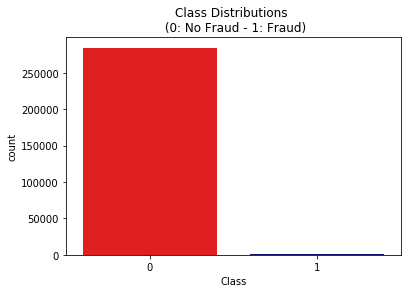

In [9]:
color = ["#FF0000","#000080"]
sns.countplot('Class', data=dataset, palette=color)
plt.title('Class Distributions \n (0: No Fraud - 1: Fraud)', fontsize=12)

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [11]:
Data = dataset.values
X = Data[:,:-1]
Y = Data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [12]:
print('Train: ', X_train.shape, X_test.shape)
print('Test: ', Y_train.shape, Y_test.shape)

Train:  (199364, 30) (85443, 30)
Test:  (199364,) (85443,)


In [13]:
np.save('/home/jaco/Downloads/creditcardfraud/np_X_train', X_train)
np.save('/home/jaco/Downloads/creditcardfraud/np_X_test', X_test)
np.save('/home/jaco/Downloads/creditcardfraud/np_Y_train', Y_train)
np.save('/home/jaco/Downloads/creditcardfraud/np_Y_test', Y_test)

In [14]:
print('Before oversampling the counts of label "1" in training dataset: {}'.format(sum(Y_train == 1)))
print('Before oversampling the counts of label "0" in training dataset: {} \n'.format(sum(Y_train == 0)))

Before oversampling the counts of label "1" in training dataset: 357
Before oversampling the counts of label "0" in training dataset: 199007 



In [15]:
sm = SMOTE(sampling_strategy='minority')
X_train_balanced, Y_train_balanced = sm.fit_sample(X_train, Y_train.ravel())

In [16]:
print('After oversampling the counts of label "1" in training dataset: {}'.format(sum(Y_train_balanced == 1)))
print('After oversampling the counts of label "0" in training dataset: {} \n'.format(sum(Y_train_balanced == 0)))

After oversampling the counts of label "1" in training dataset: 199007
After oversampling the counts of label "0" in training dataset: 199007 



In [17]:
np.save('/home/jaco/Downloads/creditcardfraud/np_Y_train_balanced', Y_train_balanced)
np.save('/home/jaco/Downloads/creditcardfraud/np_X_train_balanced', X_train_balanced)

In [18]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_balanced42, Y_train_balanced42 = sm.fit_sample(X_train, Y_train.ravel())

In [19]:
np.save('/home/jaco/Downloads/creditcardfraud/np_Y_train_balanced42', Y_train_balanced42)
np.save('/home/jaco/Downloads/creditcardfraud/np_X_train_balanced42', X_train_balanced42)

In [21]:
sm = SMOTE(random_state=2)
X_train_balanced2, Y_train_balanced2 = sm.fit_sample(X_train, Y_train.ravel())

In [22]:
np.save('/home/jaco/Downloads/creditcardfraud/np_Y_train_balanced2', Y_train_balanced2)
np.save('/home/jaco/Downloads/creditcardfraud/np_X_train_balanced2', X_train_balanced2)